# Sistema Fuzzy - Multiple Inputs Single Output (MISO)

Modelar o seguinte problema usando o modelo de Mamdani:

![4](imagens/4.png)

Regras de inferência:

![5](imagens/5.png)

### Modelo de Mamdani:

Representação do modelo baseado no problema da aula 10:

![2](imagens/2.png)

Representação do modelo baseado no problema apresentado acima:

![3](imagens/3.png)

### Importações:

In [1]:
#!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control

### Modelando antecedente:

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


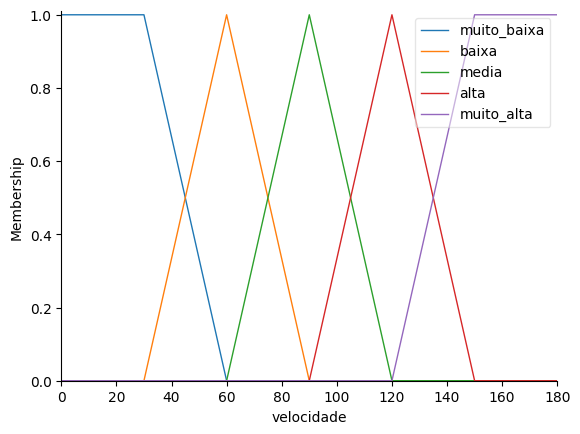

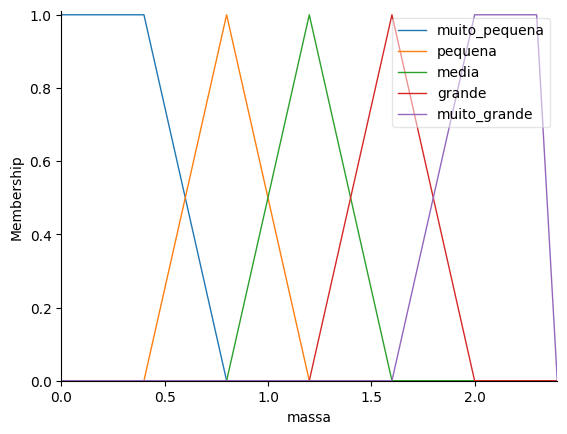

In [2]:
universo_velociade = np.arange(0, 181)
velociade = control.Antecedent(universe = universo_velociade, label = "velocidade")

velociade["muito_baixa"] = fuzzy.trapmf(velociade.universe, [0, 0, 30, 60])
velociade["baixa"] = fuzzy.trimf(velociade.universe, [30, 60, 90])
velociade["media"] = fuzzy.trimf(velociade.universe, [60, 90, 120])
velociade["alta"] = fuzzy.trimf(velociade.universe, [90, 120, 150])
velociade["muito_alta"] = fuzzy.trapmf(velociade.universe, [120, 150, 180, 180])

universo_massa = np.arange(0, 2.5, 0.1)
massa = control.Antecedent(universe = universo_massa, label = "massa")

massa["muito_pequena"] = fuzzy.trapmf(massa.universe, [0, 0, .4, .8])
massa["pequena"] = fuzzy.trimf(massa.universe, [.4, .8, 1.2])
massa["media"] = fuzzy.trimf(massa.universe, [.8, 1.2, 1.6])
massa["grande"] = fuzzy.trimf(massa.universe, [1.2, 1.6, 2.0])
massa["muito_grande"] = fuzzy.trapmf(massa.universe, [1.6, 2.0, 2.4, 2.4])

velociade.view()
massa.view()

### Modelando consequente:

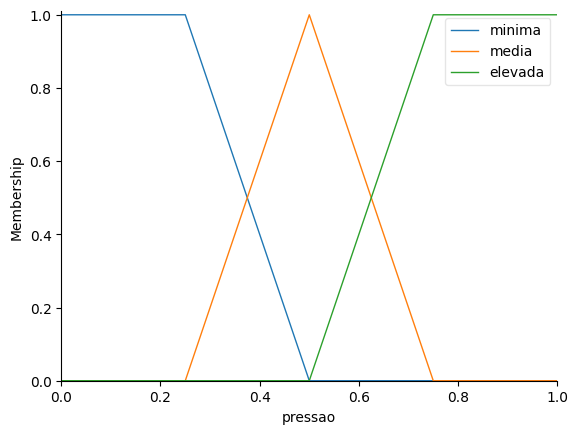

In [3]:
universo_pressao = np.arange(0, 1.1, .25)

pressao = control.Consequent(universe = universo_pressao, label = "pressao")

pressao["minima"] = fuzzy.trapmf(pressao.universe, [0, 0, .25, .25])
pressao["media"] = fuzzy.trimf(pressao.universe, [.25, .5, .75])
pressao["elevada"] = fuzzy.trapmf(pressao.universe, [.5, .75, 1, 1])

pressao.view()

### Modelando regras de inferência:

In [4]:
regras = [
  control.Rule(velociade["muito_baixa"] & massa["muito_pequena"], pressao["minima"]),
  control.Rule(velociade["muito_baixa"] & massa["pequena"], pressao["minima"]),
  control.Rule(velociade["muito_baixa"] & massa["media"], pressao["minima"]),
  control.Rule(velociade["baixa"] & massa["muito_pequena"], pressao["minima"]),
  control.Rule(velociade["baixa"] & massa["pequena"], pressao["minima"]),
  control.Rule(velociade["baixa"] & massa["media"], pressao["minima"]),
  control.Rule(velociade["media"] & massa["muito_pequena"], pressao["minima"]),
  control.Rule(velociade["media"] & massa["pequena"], pressao["minima"]),

  control.Rule(velociade["muito_baixa"] & massa["grande"], pressao["media"]),
  control.Rule(velociade["muito_baixa"] & massa["muito_grande"], pressao["media"]),
  control.Rule(velociade["baixa"] & massa["grande"], pressao["media"]),
  control.Rule(velociade["baixa"] & massa["muito_grande"], pressao["media"]),
  control.Rule(velociade["media"] & massa["media"], pressao["media"]),
  control.Rule(velociade["alta"] & massa["muito_pequena"], pressao["media"]),
  control.Rule(velociade["alta"] & massa["pequena"], pressao["media"]),
  control.Rule(velociade["alta"] & massa["media"], pressao["media"]),
  control.Rule(velociade["muito_alta"] & massa["muito_pequena"], pressao["media"]),
  control.Rule(velociade["muito_alta"] & massa["pequena"], pressao["media"]),
  control.Rule(velociade["muito_alta"] & massa["media"], pressao["media"]),

  control.Rule(velociade["media"] & massa["grande"], pressao["elevada"]),
  control.Rule(velociade["media"] & massa["muito_grande"], pressao["elevada"]),
  control.Rule(velociade["alta"] & massa["grande"], pressao["elevada"]),
  control.Rule(velociade["alta"] & massa["muito_grande"], pressao["elevada"]),
  control.Rule(velociade["muito_alta"] & massa["grande"], pressao["elevada"]),
  control.Rule(velociade["muito_alta"] & massa["muito_grande"], pressao["elevada"])
]

pressao_controle = control.ControlSystem(regras)

### Simulação do sistema:

Resultado 'desfuzzificado': 0.7215136054421768


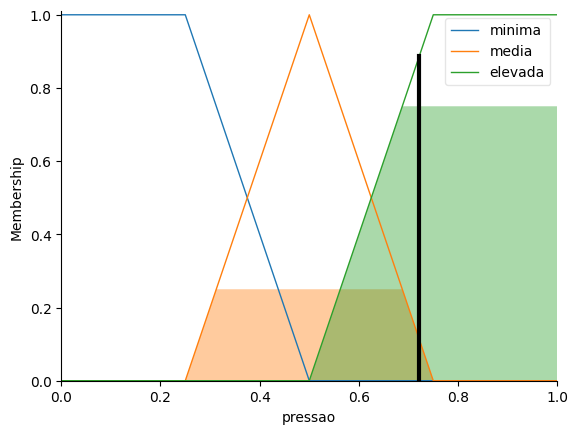

In [5]:
sistema = control.ControlSystemSimulation(pressao_controle)

sistema.input["velocidade"] = 155
sistema.input["massa"] = 1.5

sistema.compute()

print(f"Resultado 'desfuzzificado': {sistema.output['pressao']}")

pressao.view(sim = sistema)

![6](imagens/6.png)